In [1]:
import pandas as pd

In [2]:
int_twt = pd.read_csv('raw_tweets_economy.txt', sep='\t', index_col=0)
int_twt.head()

,0
0,Stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,AP Explains: Is the US economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,Who will stop mr. Mario Draghi and the ECB wit...


In [3]:
int_twt.shape

(500, 1)

In [5]:
int_twt.columns = ['tweets']

In [6]:
int_twt.head()

,tweets
0,Stocks losses deepen as a key recession warnin...
1,RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews...
2,AP Explains: Is the US economy nearing a reces...
3,A @JobCreatorsUSA / https://t.co/JXEt7hQU4k su...
4,Who will stop mr. Mario Draghi and the ECB wit...


In [10]:
int_twt.tweets.sample().values

array(['RT @elerianm: #Bloomberg on the $2 billion stimulus package announced today by the #HongKong government this morning.\r\n\r\nTargeting both the h…'],
      dtype=object)

In [11]:
tweets = int_twt.tweets.values

In [12]:
len(tweets)

500

In [13]:
tweets[:5]

array(['Stocks losses deepen as a key recession warning surfaces @GOP #economy #fail #collapse #recession #gop #greed… https://t.co/F8kazAixUk',
       "RT @CallMeAhmjusAyn: The #economy.\r\n@FoxNews @realDonaldTrump \r\n#Trump is an ejit.\r\n#maga #TrumpTrain2020 #sheeple are idiot's.\r\n#farming #Trad…",
       'AP Explains: Is the US economy nearing a recession? \r\n#Business\r\n#Economy\r\n#Recession\r\n#TradeWar\r\n#China\r\n#EU… https://t.co/0jtsR2kSxi',
       'A @JobCreatorsUSA / https://t.co/JXEt7hQU4k survey completed Tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1XMiptADx',
       'Who will stop mr. Mario Draghi and the ECB with this counterproductive course of money dumping / zero interests? It… https://t.co/eweIrVuOK0'],
      dtype=object)

In [14]:
tweets_lower = [twt.lower() for twt in tweets]

In [15]:
tweets_lower[:5]

['stocks losses deepen as a key recession warning surfaces @gop #economy #fail #collapse #recession #gop #greed… https://t.co/f8kazaixuk',
 "rt @callmeahmjusayn: the #economy.\r\n@foxnews @realdonaldtrump \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… https://t.co/0jtsr2ksxi',
 'a @jobcreatorsusa / https://t.co/jxet7hqu4k survey completed tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1xmiptadx',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… https://t.co/eweirvuok0']

In [17]:
tweets_lower[1]

"rt @callmeahmjusayn: the #economy.\r\n@foxnews @realdonaldtrump \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…"

In [20]:
import re
re.search('@\w+',tweets_lower[1]).group()

'@callmeahmjusayn'

In [23]:
## remove user handle

tweets_nouser = [re.sub('@\w+','', twt) for twt in tweets_lower]

In [24]:
tweets_nouser[:5]

['stocks losses deepen as a key recession warning surfaces  #economy #fail #collapse #recession #gop #greed… https://t.co/f8kazaixuk',
 "rt : the #economy.\r\n  \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… https://t.co/0jtsr2ksxi',
 'a  / https://t.co/jxet7hqu4k survey completed tuesday, 56% rated the #economy as good or excellent,… https://t.co/j1xmiptadx',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… https://t.co/eweirvuok0']

In [25]:
## remove usrls
tweets_nouser[2]

'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… https://t.co/0jtsr2ksxi'

In [27]:
re.search('\w+://\S+',tweets_nouser[2]).group()

'https://t.co/0jtsr2ksxi'

In [28]:
tweets_nouser1 = [re.sub('\w+://\S+','',twt) for twt in tweets_nouser]

In [29]:
tweets_nouser1[:5]

['stocks losses deepen as a key recession warning surfaces  #economy #fail #collapse #recession #gop #greed… ',
 "rt : the #economy.\r\n  \r\n#trump is an ejit.\r\n#maga #trumptrain2020 #sheeple are idiot's.\r\n#farming #trad…",
 'ap explains: is the us economy nearing a recession? \r\n#business\r\n#economy\r\n#recession\r\n#tradewar\r\n#china\r\n#eu… ',
 'a  /  survey completed tuesday, 56% rated the #economy as good or excellent,… ',
 'who will stop mr. mario draghi and the ecb with this counterproductive course of money dumping / zero interests? it… ']

In [31]:
#find all hastag
tweets_nouser1[0]

'stocks losses deepen as a key recession warning surfaces  #economy #fail #collapse #recession #gop #greed… '

In [33]:
re.findall('#\w+',tweets_nouser1[0])

['#economy', '#fail', '#collapse', '#recession', '#gop', '#greed']

In [34]:
tweets_hastag = [re.findall('#\w+',twt) for twt in tweets_nouser1]

In [35]:
tweets_hastag

[['#economy', '#fail', '#collapse', '#recession', '#gop', '#greed'],
 ['#economy',
  '#trump',
  '#maga',
  '#trumptrain2020',
  '#sheeple',
  '#farming',
  '#trad'],
 ['#business', '#economy', '#recession', '#tradewar', '#china', '#eu'],
 ['#economy'],
 [],
 ['#economy', '#learnenglish', '#businessenglish'],
 ['#futures',
  '#trade',
  '#earnings',
  '#currency',
  '#trading',
  '#forex',
  '#fx',
  '#markets',
  '#economy'],
 [],
 ['#economy', '#trump'],
 ['#economy', '#trump', '#maga', '#trumptrain2020', '#sheeple', '#farming'],
 ['#floods2019'],
 [],
 [],
 [],
 [],
 ['#thursday',
  '#conversationsdailynews',
  '#news',
  '#truthoftheday',
  '#music',
  '#singer'],
 ['#invertedyieldcurve'],
 [],
 ['#economy', '#472'],
 ['#economy', '#134'],
 ['#economy', '#140'],
 ['#economy', '#785'],
 ['#economy'],
 ['#economy', '#tollways'],
 ['#travel'],
 [],
 ['#china'],
 ['#fintech'],
 ['#company'],
 ['#altcoins', '#bitcoin'],
 [],
 ['#china'],
 ['#economy'],
 ['#retweet', '#poverty', '#ows', 

In [42]:
all_hastag = []
for twt in tweets_hastag:
    all_hastag.extend(twt)


In [43]:
all_hastag[:5]

['#economy', '#fail', '#collapse', '#recession', '#gop']

In [44]:
len(all_hastag)

1061

In [39]:
## remove #economy

In [47]:
str1 = '#economy'
all_hastag = [tag for tag in all_hastag if tag not in str1]

In [48]:
len(all_hastag)

813

In [49]:
all_hastag[:5]

['#fail', '#collapse', '#recession', '#gop', '#greed']

In [50]:
from collections import Counter

In [52]:
counts_hastag = Counter(all_hastag)

In [60]:
res=counts_hastag.most_common(10)

In [63]:
res2 = {term:cnt for term, cnt in res}

In [57]:
import matplotlib.pyplot as plt

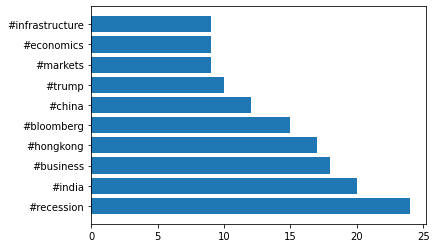

In [65]:
plt.barh(list(res2.keys()), list(res2.values()),)
plt.show()